# Import Library

In [618]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [619]:
df = pd.read_csv('./Dataset/water_pollution_disease.csv')

# Exploratory Data Analysis

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [621]:
df.describe()

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.012667,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,49.270000,50.811900,50036.196667,50.029193,50.062480,60.371007,1591.849000,20.130917,505.390333
std,7.229287,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,28.984165,28.465323,28598.750508,28.896676,22.779125,23.159678,817.502434,11.689244,283.275224
min,2000.000000,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,0.000000,2.060000,521.000000,0.190000,10.030000,20.010000,200.000000,0.060000,10.000000
25%,2006.000000,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,24.000000,26.467500,25010.250000,24.982500,30.557500,40.440000,865.750000,9.840000,254.750000
50%,2012.000000,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,49.000000,50.230000,49621.500000,50.390000,49.795000,60.580000,1572.000000,20.175000,513.000000
75%,2018.000000,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,75.000000,76.260000,74778.250000,74.817500,69.727500,80.420000,2308.250000,30.672500,745.000000
max,2024.000000,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,99.000000,99.990000,99948.000000,99.980000,89.980000,99.990000,2999.000000,39.990000,999.000000


### Cek Korelasi Data Numerik

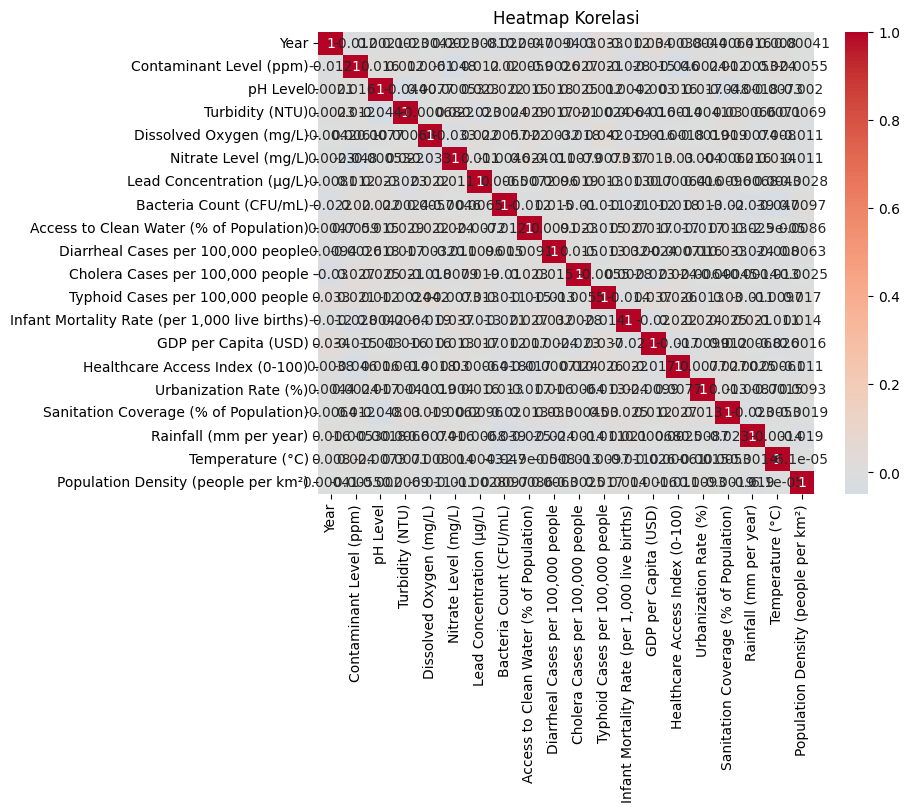

In [622]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()

# Data Preprocessing

### Handle Outlier

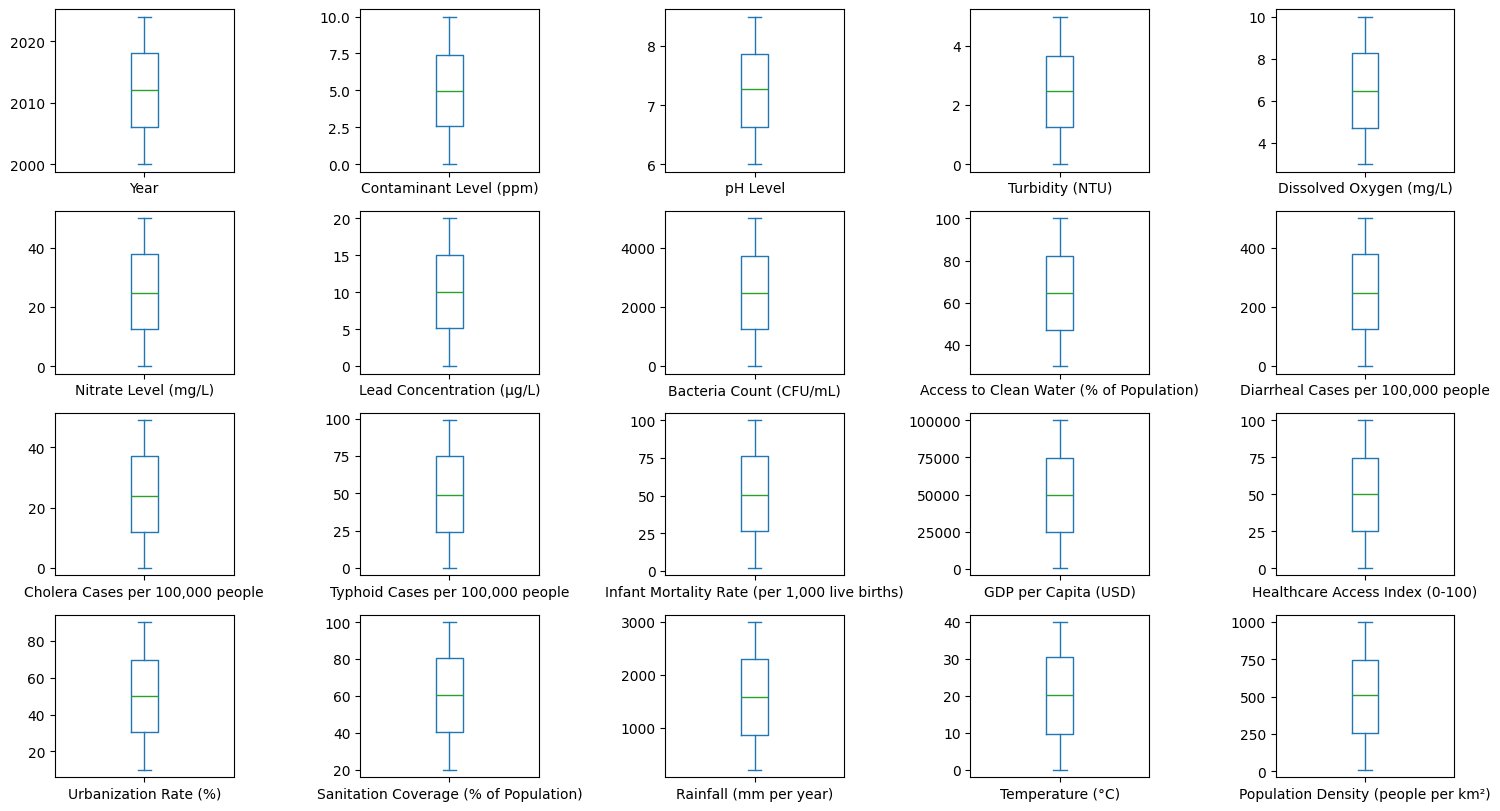

In [623]:
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### Handle Missing Values

In [624]:
df.isnull().sum()

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [625]:
df['Water Treatment Method'].value_counts()

Water Treatment Method
Boiling         777
Chlorination    748
Filtration      728
Name: count, dtype: int64

In [626]:
df['Water Treatment Method'] = df['Water Treatment Method'].fillna('Unknown')

In [627]:
df.isnull().sum()

Country                                          0
Region                                           0
Year                                             0
Water Source Type                                0
Contaminant Level (ppm)                          0
pH Level                                         0
Turbidity (NTU)                                  0
Dissolved Oxygen (mg/L)                          0
Nitrate Level (mg/L)                             0
Lead Concentration (µg/L)                        0
Bacteria Count (CFU/mL)                          0
Water Treatment Method                           0
Access to Clean Water (% of Population)          0
Diarrheal Cases per 100,000 people               0
Cholera Cases per 100,000 people                 0
Typhoid Cases per 100,000 people                 0
Infant Mortality Rate (per 1,000 live births)    0
GDP per Capita (USD)                             0
Healthcare Access Index (0-100)                  0
Urbanization Rate (%)          

### Labelling Data (Untuk Klasifikasi)

In [628]:
df['Total_Disease_Cases'] = (
    df['Diarrheal Cases per 100,000 people'] +
    df['Cholera Cases per 100,000 people'] +
    df['Typhoid Cases per 100,000 people']
)

threshold = df['Total_Disease_Cases'].quantile(3/4)

print("Threshold:", threshold)

def label_risk_level(value):
    if value <= threshold:
        return 0 
    else:
        return 1

df['Risk_Level'] = df['Total_Disease_Cases'].apply(label_risk_level)

print("\nDistribusi Risk_Level:")
print(df['Risk_Level'].value_counts().sort_index())

Threshold: 450.0

Distribusi Risk_Level:
Risk_Level
0    2252
1     748
Name: count, dtype: int64


### Balancing Data

In [629]:
# df_majority = df[df['Risk_Level'] == 0]
# df_minority = df[df['Risk_Level'] == 1]

# df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# df_balanced = pd.concat([df_majority_undersampled, df_minority], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# print("Distribusi setelah undersampling:")
# print(df_balanced['Risk_Level'].value_counts())

### Drop Unused Columns

In [630]:
df.drop(columns=['Country', 
                 'Region', 
                 'Year', 
                 'Infant Mortality Rate (per 1,000 live births)', 
                 'Urbanization Rate (%)',
                 'Diarrheal Cases per 100,000 people', 
                 'Cholera Cases per 100,000 people', 
                 'Typhoid Cases per 100,000 people',
                 'Total_Disease_Cases'], 
                 axis=1, inplace=True)

In [631]:
df.head()

,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Water Treatment Method,Access to Clean Water (% of Population),GDP per Capita (USD),Healthcare Access Index (0-100),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²),Risk_Level
0,Lake,6.06,7.12,3.93,4.28,8.28,7.89,3344,Filtration,33.60,57057,96.92,63.23,2800,4.94,593,1
1,Well,5.24,7.84,4.79,3.86,15.74,14.68,2122,Boiling,89.54,17220,84.73,29.12,1572,16.93,234,0
2,Pond,0.24,6.43,0.79,3.42,36.67,9.96,2330,Unknown,35.29,86022,58.37,93.56,2074,21.73,57,0
3,Well,7.91,6.71,1.96,3.12,36.92,6.77,3779,Boiling,57.53,31166,39.07,94.25,937,3.79,555,0
4,Well,0.12,8.16,4.22,9.15,49.35,12.51,4182,Filtration,36.60,25661,23.03,69.23,2295,31.44,414,1


### Encoding & Scaling

In [632]:
def quick_preprocess(df, categorical_cols=None, numeric_cols=None):
    """
    Fungsi untuk melakukan preprocessing data termasuk one-hot encoding dan standard scaling.
    
    Parameters:
    - df: DataFrame pandas yang akan diproses
    - categorical_cols: list kolom kategorikal untuk one-hot encoding
    - numeric_cols: list kolom numerik untuk standard scaling
    
    Returns:
    - DataFrame yang sudah diproses
    - preprocessing transformer untuk digunakan pada data baru
    """

    if categorical_cols is None:
        categorical_cols = df.dtypes[df.dtypes.isin(['object', 'category', 'bool'])].index.tolist()
    
    if numeric_cols is None:
        numeric_cols = df.dtypes[df.dtypes.isin(['int64', 'float64'])].index.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
            ('num', StandardScaler(), numeric_cols)
        ],
        remainder='drop'
    )
    
    processed_data = preprocessor.fit_transform(df)
    
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_features = list(cat_features) + numeric_cols
    
    processed_df = pd.DataFrame(processed_data, columns=all_features)
    
    return processed_df, preprocessor, cat_features, all_features

processed_df, preprocessor, cat_features, all_features = quick_preprocess(df.drop(columns=['Risk_Level'], axis=1))

In [633]:
processed_df.head()

,Water Source Type_Lake,Water Source Type_Pond,Water Source Type_River,Water Source Type_Spring,Water Source Type_Tap,Water Source Type_Well,Water Treatment Method_Boiling,Water Treatment Method_Chlorination,Water Treatment Method_Filtration,Water Treatment Method_Unknown,...,Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),GDP per Capita (USD),Healthcare Access Index (0-100),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.158418,-0.372229,0.597773,-1.527319,0.245534,1.622976,0.123468,1.478103,-1.299780,0.309326
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.644033,0.799011,-0.256066,1.227657,-1.147661,1.201058,-1.349596,-0.024284,-0.273880,-0.958204
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.799141,-0.015165,-0.110732,-1.444089,1.258510,0.288691,1.433290,0.589884,0.136822,-1.583143
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.816380,-0.565423,0.901717,-0.348796,-0.659936,-0.379318,1.463088,-0.801170,-1.398178,0.175158
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.673458,0.424697,1.183303,-1.379573,-0.852459,-0.934491,0.382582,0.860264,0.967639,-0.322674


# Training Model

### Split Data

In [634]:
X = processed_df
y = df[['Risk_Level']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Training Model

In [635]:
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [636]:
y_pred = xgb.predict(X_test)

In [637]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy Score: {acc:.2f}")

print(f"Classification Report: \n{classification_report(y_true=y_test, y_pred=y_pred)}")

Accuracy Score: 0.69
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       687
           1       0.22      0.12      0.16       213

    accuracy                           0.69       900
   macro avg       0.49      0.49      0.48       900
weighted avg       0.63      0.69      0.65       900



AUC Score: 0.4916


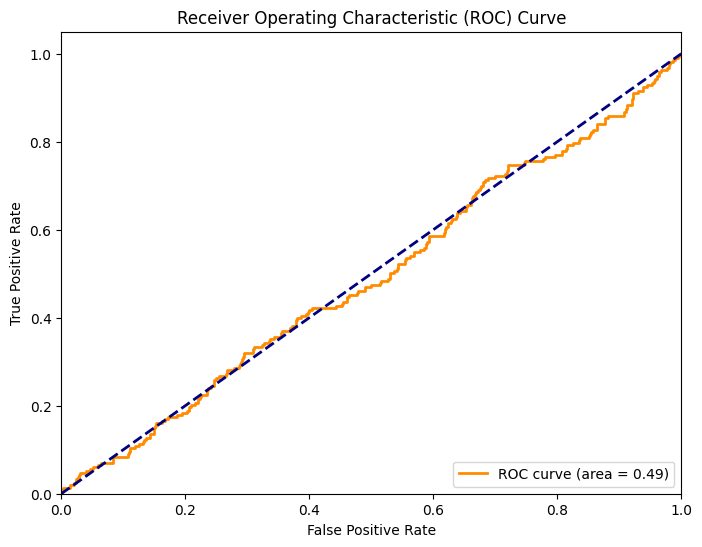

In [638]:
y_probs = xgb.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [639]:
importances = xgb.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
3,Water Source Type_Spring,0.129107
7,Water Treatment Method_Chlorination,0.101686
4,Water Source Type_Tap,0.095245
5,Water Source Type_Well,0.093482
6,Water Treatment Method_Boiling,0.084893
1,Water Source Type_Pond,0.075279
9,Water Treatment Method_Unknown,0.071272
2,Water Source Type_River,0.064513
8,Water Treatment Method_Filtration,0.056373
0,Water Source Type_Lake,0.028203


### Testing

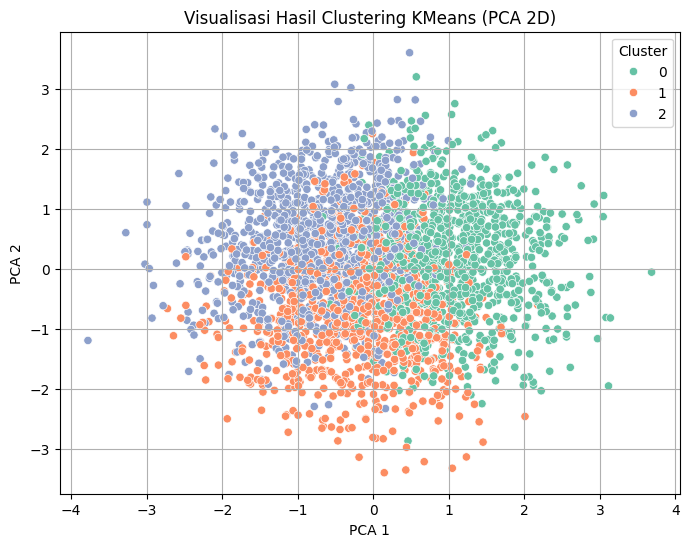

In [640]:
from sklearn.cluster import KMeans

# 1. Preprocessing (gunakan yang sudah kamu punya)
X_cluster, preprocessor, cat_features, all_features = quick_preprocess(df.drop(columns=['Risk_Level']))

# 2. Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# 3. Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# 4. Tambahkan cluster ke DataFrame
df['Cluster'] = clusters

# 5. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Visualisasi Hasil Clustering KMeans (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
